<a href="https://colab.research.google.com/github/sejallotliker/MLnow_2.0/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

Linear regression

Author: `Sejal Lotliker`

Date: `11-06-2021`

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [5]:
path='/content/drive/MyDrive/Machine learning course by Girlscript/ML_EDA_Students performance in exam/StudentsPerformance.csv'
my_data=my_data=pd.read_csv(path)

In [6]:
my_data.head()

,gender,groups,parentsEducation,lunch,test_preparation_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
unimy_data=my_data[['math score','reading score']]
unimy_data.head()

,math score,reading score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78


In [8]:
unimy_data.to_csv('univariate_my_data.csv')

In [9]:
ls

drive/  sample_data/  univariate_my_data.csv


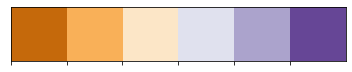

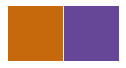

In [10]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purpole to orange colors
pal=sns.color_palette('PuOr',6) #To print 6 shades from purple to orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697'] #orange purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [11]:
unimy_data.columns

Index(['math score', 'reading score'], dtype='object')

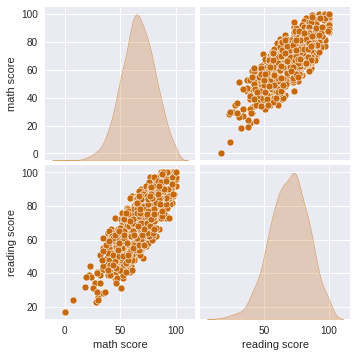

In [12]:
#pairplot for all the values
sns.pairplot(unimy_data,
             x_vars = ['math score', 'reading score'],
             y_vars = ['math score', 'reading score'],
             diag_kind='kde' 
             )

#Data splitting

Data splitting is done for univariate my_data

In [13]:
# 80-20 train-test percent split
trainDataset= unimy_data.sample(frac=0.8, random_state=0)
testDataset= unimy_data.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78
    math score  reading score
9           38             60
11          40             52
19          54             58
23          69             73
28          70             70


In [14]:
print(trainDataset.shape)
print(testDataset.shape)

(800, 2)
(200, 2)


In [15]:
# to copy the trainDataset dataframe for getting the features
trainFeatures= trainDataset.copy()
testFeatures= testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78
    math score  reading score
9           38             60
11          40             52
19          54             58
23          69             73
28          70             70


In [16]:
#To remove the math score column and saving it into the labels variables

trainLabels = trainFeatures.pop('math score')
testLabels = testFeatures.pop('math score')

print(trainLabels.head())
print(testLabels.head())

993    62
859    87
298    40
553    77
672    69
Name: math score, dtype: int64
9     38
11    40
19    54
23    69
28    70
Name: math score, dtype: int64


In [17]:
print(trainFeatures.head())
print(testFeatures.head())

     reading score
993             72
859             73
298             46
553             62
672             78
    reading score
9              60
11             52
19             58
23             73
28             70


In [18]:
print(testFeatures.shape)
print(trainFeatures.shape)

(200, 1)
(800, 1)


In [19]:
# For univariate -- Num features = 1
# for multivariate -- Num Features> 1 = 11

model = tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

In [20]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001) #learning rate specified as 0.001
    #optimizer = 'adam', # takes the default learning rate
    ,metrics = ['mae','mse']  
)

In [21]:
numEpochs = 300
history = model.fit(x=trainFeatures, y=trainLabels, validation_data=(testFeatures, testLabels), epochs= numEpochs)

Epoch 1/300
25/25 [==============================] - 1s 10ms/step - loss: 76.3994 - mae: 76.3994 - mse: 6122.8442 - val_loss: 73.5676 - val_mae: 73.5676 - val_mse: 5692.8462
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 74.6390 - mae: 74.6390 - mse: 5845.9233 - val_loss: 71.8510 - val_mae: 71.8510 - val_mse: 5432.9038
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 72.8750 - mae: 72.8750 - mse: 5574.7485 - val_loss: 70.1357 - val_mae: 70.1357 - val_mse: 5179.3232
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 71.1170 - mae: 71.1170 - mse: 5312.9287 - val_loss: 68.4113 - val_mae: 68.4113 - val_mse: 4930.5811
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 69.3551 - mae: 69.3551 - mse: 5055.6743 - val_loss: 66.6892 - val_mae: 66.6892 - val_mse: 4688.3828
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 67.5891 - mae: 67.5891 - mse: 4803.8979 - val_loss: 64.9768 -

In [22]:
print(history)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


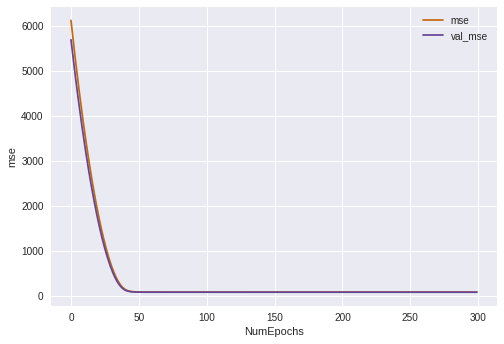

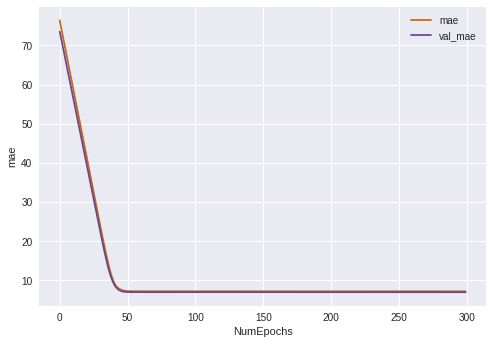

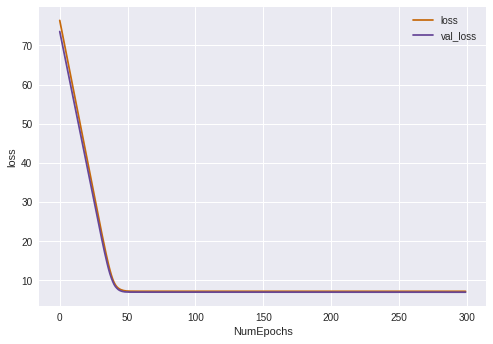

In [24]:
#tempString = 'mse'
def curvePlots(tempString):

 plt.plot(history.history[tempString])
 plt.plot(history.history[f'val_{tempString}'])
 plt.xlabel('NumEpochs')
 plt.ylabel(tempString)
 plt.legend([tempString ,f'val_{tempString}'])
 plt.show()

curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [25]:
model.predict([1])

array([[2.5997524]], dtype=float32)

In [26]:
print(f'Prediction for input value 1:{model.predict([1])}')

#for a list of values
tempListforPreds=[1,2,3,4,5,6]
print(f'''

input List ={tempListforPreds}

List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions(flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1:[[2.5997524]]


input List =[1, 2, 3, 4, 5, 6]

List of Predictions:
[[2.5997524]
 [3.524477 ]
 [4.4492016]
 [5.373926 ]
 [6.2986503]
 [7.223375 ]]

List of Predictions(flattened out):
[2.5997524 3.524477  4.4492016 5.373926  6.2986503 7.223375 ]



In [27]:
print(testFeatures)

     reading score
9               60
11              52
19              58
23              73
28              70
..             ...
962            100
966             68
976             62
980             24
983             87

[200 rows x 1 columns]


In [30]:
testPreds = model.predict([testFeatures]).flatten()

In [29]:
print(len(testPreds))
print(testPreds)

200
[57.1585   49.760704 55.30905  69.17992  66.40574  68.25519  76.57771
 69.17992  55.30905  61.782124 67.33047  73.803535 52.534878 56.233776
 59.932674 48.83598  46.98653  45.13708  37.739285 78.42716  67.33047
 33.11566  81.20133  76.57771  63.631573 63.631573 72.878815 65.48102
 54.384327 77.50243  79.35188  35.889835 58.083225 41.438183 64.5563
 71.029366 63.631573 66.40574  71.029366 48.83598  72.878815 64.5563
 47.911255 65.48102  49.760704 60.8574   53.459602 76.57771  65.48102
 58.083225 68.25519  47.911255 70.10464  60.8574   69.17992  72.878815
 74.728264 40.51346  71.95409  66.40574  73.803535 59.932674 49.760704
 77.50243  71.029366 69.17992  57.1585   39.588734 63.631573 49.760704
 60.8574   81.20133  50.68543  44.212357 71.029366 64.5563   84.90023
 60.8574   72.878815 69.17992  91.37331  89.52386  46.98653  73.803535
 60.8574   63.631573 59.932674 67.33047  78.42716  80.27661  62.70685
 68.25519  69.17992  77.50243  44.212357 80.27661  61.782124 51.610153
 81.20133  4

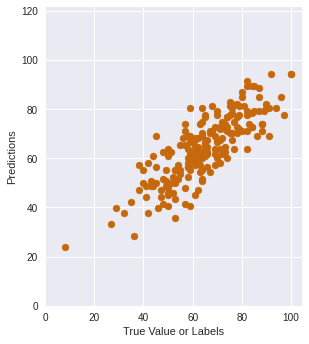

In [31]:
# prediciton plot - To see how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

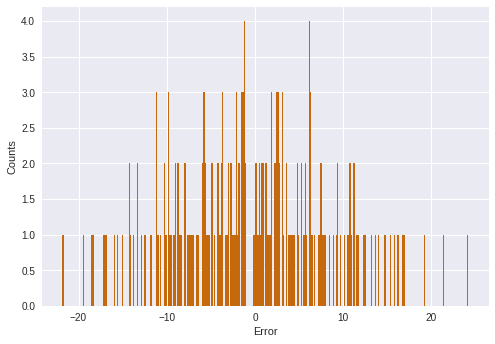

In [32]:
#error plot -- It is a gaussian distribution 
# Shows how much the model deviates from the central value

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)